In [77]:
!ls

Untitled.ipynb airline.csv


This is exploratory data from Bureau of Transport Statistics. I download, clean and analyze this data. 
Explanations of the columns can be found in https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On%20Time. I am interested in Departure delay of the flights.

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
!head airline.csv

"YEAR","QUARTER","MONTH","DAY_OF_MONTH","DAY_OF_WEEK","FL_DATE","OP_UNIQUE_CARRIER","OP_CARRIER_AIRLINE_ID","ORIGIN_AIRPORT_ID","ORIGIN_AIRPORT_SEQ_ID","ORIGIN_CITY_MARKET_ID","ORIGIN","ORIGIN_CITY_NAME","ORIGIN_STATE_ABR","ORIGIN_STATE_FIPS","ORIGIN_STATE_NM","DEST_AIRPORT_ID","DEST_AIRPORT_SEQ_ID","DEST_CITY_MARKET_ID","DEST","DEST_CITY_NAME","DEST_STATE_ABR","DEST_STATE_FIPS","DEST_STATE_NM","DEST_WAC","CRS_DEP_TIME","DEP_TIME","DEP_DELAY","CRS_ARR_TIME","ARR_TIME","ARR_DELAY","FLIGHTS","DISTANCE","CARRIER_DELAY","WEATHER_DELAY","NAS_DELAY","SECURITY_DELAY","LATE_AIRCRAFT_DELAY",
2020,1,1,1,3,2020-01-01,"WN",19393,13891,1389101,32575,"ONT","Ontario, CA","CA","06","California",14771,1477104,32457,"SFO","San Francisco, CA","CA","06","California",91,"1810","1851",41.00,"1945","2053",68.00,1.00,363.00,8.00,0.00,27.00,0.00,33.00,
2020,1,1,1,3,2020-01-01,"WN",19393,13891,1389101,32575,"ONT","Ontario, CA","CA","06","California",14771,1477104,32457,"SFO","San Francisco, CA","CA","06","Calif

In [80]:
!wc -l airline.csv

  607347 airline.csv


In [81]:
df = pd.read_csv('airline.csv',parse_dates =['FL_DATE'],infer_datetime_format = True)

In [82]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,...,ARR_TIME,ARR_DELAY,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 38
0,2020,1,1,1,3,2020-01-01,WN,19393,13891,1389101,...,2053.0,68.0,1.0,363.0,8.0,0.0,27.0,0.0,33.0,NaN
1,2020,1,1,1,3,2020-01-01,WN,19393,13891,1389101,...,1318.0,-2.0,1.0,363.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,1,1,1,3,2020-01-01,WN,19393,13891,1389101,...,2124.0,-6.0,1.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,1,1,1,3,2020-01-01,WN,19393,13891,1389101,...,1505.0,10.0,1.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,1,1,1,3,2020-01-01,WN,19393,13891,1389101,...,1023.0,-12.0,1.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607346 entries, 0 to 607345
Data columns (total 39 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   YEAR                   607346 non-null  int64         
 1   QUARTER                607346 non-null  int64         
 2   MONTH                  607346 non-null  int64         
 3   DAY_OF_MONTH           607346 non-null  int64         
 4   DAY_OF_WEEK            607346 non-null  int64         
 5   FL_DATE                607346 non-null  datetime64[ns]
 6   OP_UNIQUE_CARRIER      607346 non-null  object        
 7   OP_CARRIER_AIRLINE_ID  607346 non-null  int64         
 8   ORIGIN_AIRPORT_ID      607346 non-null  int64         
 9   ORIGIN_AIRPORT_SEQ_ID  607346 non-null  int64         
 10  ORIGIN_CITY_MARKET_ID  607346 non-null  int64         
 11  ORIGIN                 607346 non-null  object        
 12  ORIGIN_CITY_NAME       607346 non-null  obje

#### Investigate DEP Delay.
Take only those rows where DEP_DELAY delay is reported and 

Find out, if there is any null values

In [90]:
df.DEP_DELAY.isnull().sum()

6699

Take only those rows where DEP_DELAY is reported.

In [105]:
data = df[df['DEP_DELAY'].notna()]
print("Rows of data ", len(data))

Rows of data  600647


Find fraction of flights that were on time. This assumes DEP_delay is reported on these flights

In [106]:
100*len(data[data['DEP_DELAY']==0])/len(data)

5.013427187682615

Only 5.01% flights were reported with value of Departure Delay as zero. Lets look at the histogram of delays.

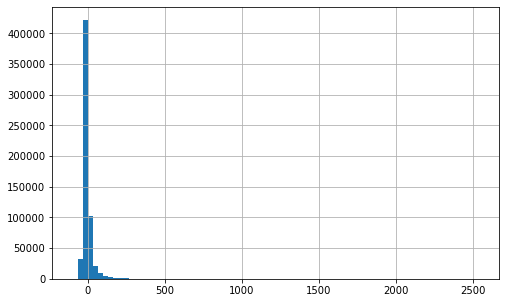

In [112]:
data.ARR_DELAY.hist(bins=80,figsize =(8,5))

Take only those rows where departure delay is 500 or less

In [113]:
data = data[data['DEP_DELAY']<=500]

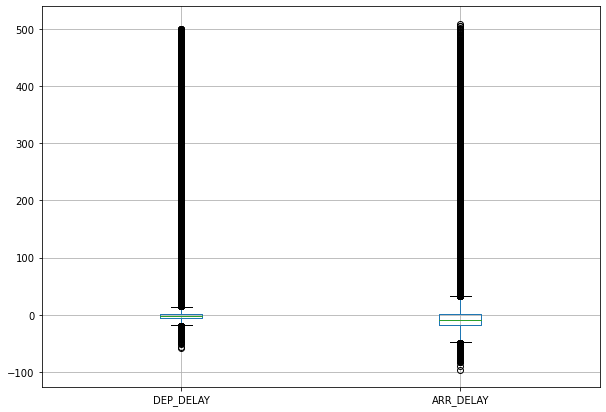

In [115]:
boxplot = data.boxplot(column=['DEP_DELAY','ARR_DELAY'],figsize = (10,7))

Assuming flight time is about the same, we can expact Arrival and Departure delay are correlated. So, we can do a linear regression on that data. 

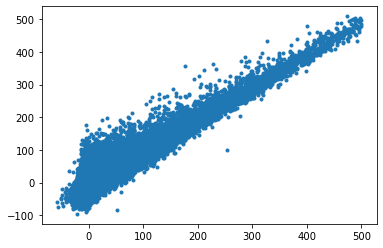

In [117]:
plt.plot(data['DEP_DELAY'],data['ARR_DELAY'],'.')

In [199]:
from sklearn.linear_model import LinearRegression 
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [200]:
#Fill None in ARR_DELAY with corresponding DEP_DELAY values
data['ARR_DELAY'].fillna(data['DEP_DELAY'],inplace = True)
y = data['ARR_DELAY'].values.reshape(len(data),1)
X = data['DEP_DELAY'].values.reshape(len(data),1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [250]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [251]:
# The coefficients
print('Coefficients:', reg.coef_,' Intercept ',reg.intercept_)
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))

Coefficients: [[1.00386386]]  Intercept  [-7.7457785]
Mean squared error: 183.46
Coefficient of determination: 0.85


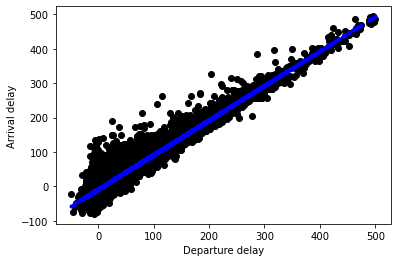

In [252]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, Y_model,'.', color='blue', linewidth=3)
plt.xlabel('Departure delay')
plt.ylabel('Arrival delay')
plt.show()

In terms of hypothesis testing. We are assuming the model is $Y = \beta_0+ \beta_1+\epsilon$

$\text{NULL hypothesis is } H_0: \text{There is no relation between Dep_delay and Arr_delay}$

$\text{Alternative hypothesis is } H_a: \text{There is some relation between Dep_delay and Arr_delay}$

Mathematically, this corresponds to testing

$H_0 : \beta _1 = 0$

Versus

$H_a : \beta _1 \neq 0$






In [255]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [257]:
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 2.612e+06
Date:                Fri, 07 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:19:07   Log-Likelihood:            -1.9304e+06
No. Observations:              479934   AIC:                         3.861e+06
Df Residuals:                  479932   BIC:                         3.861e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.7458      0.020   -391.922      0.0